In [56]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from datetime import datetime
from datetime import timedelta
import time
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
driver = webdriver.Chrome(executable_path='C:/Users/goyal/Downloads/chromedriver_win32/chromedriver.exe')


In [45]:
driver.get("https://fast.com")

In [46]:
refresh = driver.find_element_by_id("speed-progress-indicator-icon")

In [50]:
# test running specifications
step = 60 # in seconds
del_time = .5 # in hours
stop_time = datetime.now() + timedelta(hours=del_time)

In [52]:
print(stop_time.strftime("%I:%M %p"))

10:01 PM


In [53]:
time_array = []
timestamp_array = []
speed_array = []

In [55]:
while(datetime.now().strftime("%H%M%S") <= stop_time.strftime("%H%M%S")):
    refresh.click()
    print(datetime.now().strftime("%H%M%S"), stop_time.strftime("%H%M%S"))
    try:
        speed_element = WebDriverWait(driver, 60).until(
            EC.presence_of_element_located((By.CLASS_NAME, "succeeded"))
        )
        speed = float(speed_element.text)
        units = driver.find_element_by_id("speed-units").text
        if (units == 'Kbps'):
            speed = speed/1024.0
        elif(units == 'Bps'):
            speed = speed/(1024.0*1024.0)
        current_timestamp = datetime.now().time()
        current_time = current_timestamp.strftime("%I:%M %p")
        speed_array.append(speed)
        time_array.append(current_time)
        timestamp_array.append(current_timestamp)
        print(current_time, speed)
        print("---------------------")
        time.sleep(step)
    except:
        pass

213443 220110
09:35 PM 1.3
---------------------
213617 220110
09:36 PM 2.0
---------------------
213748 220110
09:37 PM 4.0
---------------------
213858 220110
09:39 PM 3.2
---------------------
214015 220110
09:40 PM 2.2
---------------------
214124 220110
09:41 PM 1.1
---------------------
214251 220110
09:43 PM 2.7
---------------------
214400 220110
09:44 PM 4.3
---------------------
214524 220110
09:45 PM 1.3
---------------------
214641 220110
09:46 PM 1.4
---------------------
214758 220110
09:48 PM 2.8
---------------------
214929 220110
09:50 PM 1.7
---------------------
215105 220110
09:51 PM 1.5
---------------------
215244 220110
09:53 PM 8.6
---------------------
215422 220110
09:54 PM 3.1
---------------------
215550 220110
09:56 PM 6.1
---------------------
215700 220110
09:57 PM 3.4
---------------------
215813 220110
09:58 PM 2.3
---------------------
215929 220110
09:59 PM 3.0
---------------------
220038 220110
10:00 PM 6.4
---------------------


In [59]:
df = pd.DataFrame(list(zip(time_array, speed_array)), columns=["Time", "Speed"])
print(df)

Time  Speed
0   09:35 PM    1.3
1   09:36 PM    2.0
2   09:37 PM    4.0
3   09:39 PM    3.2
4   09:40 PM    2.2
5   09:41 PM    1.1
6   09:43 PM    2.7
7   09:44 PM    4.3
8   09:45 PM    1.3
9   09:46 PM    1.4
10  09:48 PM    2.8
11  09:50 PM    1.7
12  09:51 PM    1.5
13  09:53 PM    8.6
14  09:54 PM    3.1
15  09:56 PM    6.1
16  09:57 PM    3.4
17  09:58 PM    2.3
18  09:59 PM    3.0
19  10:00 PM    6.4


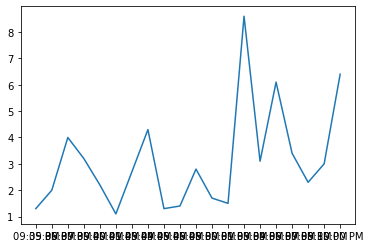

In [62]:
plt.plot(time_array, speed_array)
plt.show()

In [ ]:
# Targets:
# 1. step
# 2. user input time - two formats - in till x hrs and in until x am/pm
